## Hypothesis Testing
1. Defining Null and Alternative Hypothesis
2. Importing Libraries and Data Set
3. Preparing The Data
3. Finding Confidence Interval and P value
4. Clarifying Alternative Hypothesis
5. Testing with Large Data
6. Conclusion

### 1.Defining Null and Alternative Hypothesis

1- Book between 4 and 5 rating are not all series

2- The best 100 books are all below 1000 pages

3- Books are getting shorter through years!

4- The books with the highest review number will also have good ratings!

5- The best 100 books are all series

6- which genres are getting popular? Not Hypothesis material I think 

### 2.Importing Libraries and Data Set

In [1]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import re
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams #Import rcParams to set font styles

#Set font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#Importing Data Set
def importing_test_data():
    df=pd.read_csv("/work/Good_reads_Best_2000s/big_books_clean.csv")
    return df
df=importing_test_data()

### 3.Preparing The Data

In [3]:
#Showing first 5 row of data
df.head()

,Title,URL,Author,Average_rating,Rating,Reviews,Pages,Year,Series,Setting,Awards,Genres,Awards_no
0,Harry Potter and the Deathly Hallows (Harry Po...,https://www.goodreads.com//book/show/136251.Ha...,J.K. Rowling,4.62,2959574.0,68456.0,759.0,2007.0,1,"['London', ' England United Kingdom', ' Ho...",['Locus Award Nominee for Best Young Adult Nov...,"['Fantasy', ' Young Adult', ' Fiction']",8.0
1,"The Hunger Games (The Hunger Games, #1)",https://www.goodreads.com//book/show/2767052-t...,Suzanne Collins,4.32,6685572.0,175503.0,374.0,2008.0,1,"['District 12', ' Panem Capitol', ' Panem Pa...","[""Locus Award Nominee for Best Young Adult Boo...","['Young Adult', ' Fiction', ' Science Fiction']",41.0
2,Harry Potter and the Half-Blood Prince (Harry ...,https://www.goodreads.com//book/show/1.Harry_P...,J.K. Rowling,4.57,2575436.0,42018.0,652.0,2006.0,1,['Hogwarts School of Witchcraft and Wizardry ...,['Locus Award Nominee for Best Young Adult Nov...,"['Fantasy', ' Young Adult', ' Fiction']",3.0
3,Harry Potter and the Goblet of Fire (Harry Pot...,https://www.goodreads.com//book/show/6.Harry_P...,J.K. Rowling,4.56,2749984.0,49584.0,734.0,2002.0,1,"['Hogwarts School of Witchcraft and Wizardry',...","[""Hugo Award for Best Novel (2001), Mythopoeic...","['Fantasy', ' Young Adult', ' Fiction']",9.0
4,Harry Potter and the Order of the Phoenix (Har...,https://www.goodreads.com//book/show/2.Harry_P...,J.K. Rowling,4.50,2653470.0,45376.0,870.0,2004.0,1,['Hogwarts School of Witchcraft and Wizardry ...,"[""Bram Stoker Award for Works for Young Reader...","['Fantasy', ' Young Adult', ' Fiction']",9.0


In [4]:
print(df.shape)


(1000, 13)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1000 non-null   object 
 1   URL             1000 non-null   object 
 2   Author          999 non-null    object 
 3   Average_rating  999 non-null    float64
 4   Rating          999 non-null    float64
 5   Reviews         999 non-null    float64
 6   Pages           996 non-null    float64
 7   Year            996 non-null    float64
 8   Series          1000 non-null   int64  
 9   Setting         673 non-null    object 
 10  Awards          999 non-null    object 
 11  Genres          1000 non-null   object 
 12  Awards_no       619 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 101.7+ KB


# 2- Testing Hypothesis 

## 1- Book between 4 and 5 rating are not all series

H(1)  The Alternative Hypothesis : all books with a rate between 4 and 5 are not part of a series, 

H(0) The Null Hypothesis : Not all books between 4 and 5 rates are part of a series  

p (probability of a book is part of a series  Given that the book have a rate between 4  and 5 ).

In [6]:
df_Hypof = df[['Average_rating', 'Series']]
df_Hypof = df_Hypof.loc[(df_Hypof.Average_rating >= 4)]


In [7]:
print(df_Hypof.Series.mean()) # prints mean blood pressure
print(sm.stats.ztest(df_Hypof.Series, value=0.62)) #print p values

0.6206896551724138
(0.03152680437246157, 0.9748494159681361)


### P value is less than 0.05 so null Hypothesis is true

## 2-  The best 100 books are all below 1000 pages

H(1)  The Alternative Hypothesis : All of the best 100 boos are below 1000 pages

H(0) The Null Hypothesis: Some of the best 100 books are 1000 pages or more

In [8]:
df_Hypo1000 = df[:100]
#df_Hypo2 = df_Hypof.loc[(df_Hypo1000.Pages >= 1000)]
p_1000 = df_Hypo1000[df_Hypo1000.Pages >= 1000].shape[0] / df.shape[0]
pages_v = df_Hypo1000["Pages"].value_counts()
print(p_1000)
print(pages_v)

print(sm.stats.ztest(df_Hypo1000.Pages, value=pages_v)) 

0.004
288.0     3
304.0     2
485.0     2
294.0     2
335.0     2
         ..
307.0     1
241.0     1
4100.0    1
381.0     1
541.0     1
Name: Pages, Length: 88, dtype: int64
(288.0    NaN
304.0    NaN
485.0    NaN
294.0    NaN
335.0    NaN
          ..
307.0    NaN
241.0    NaN
4100.0   NaN
381.0    NaN
541.0    NaN
Name: Pages, Length: 88, dtype: float64, array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]))


### Probability of a book has 1000 pages or more and be also in the best 100 books in the decade are 0.004 which means null hypothesis is true 

## 3- Books are getting shorter through years!

H(1):  The Alternative Hypothesis is that books are getting shorter each year than the year before  along the 2000's decade

H(0): The Null Hypothesis is that Books are not getting shorter  

There is two ways to test this hypothesis, one is plotting the number of pages with years and check the data distributions 

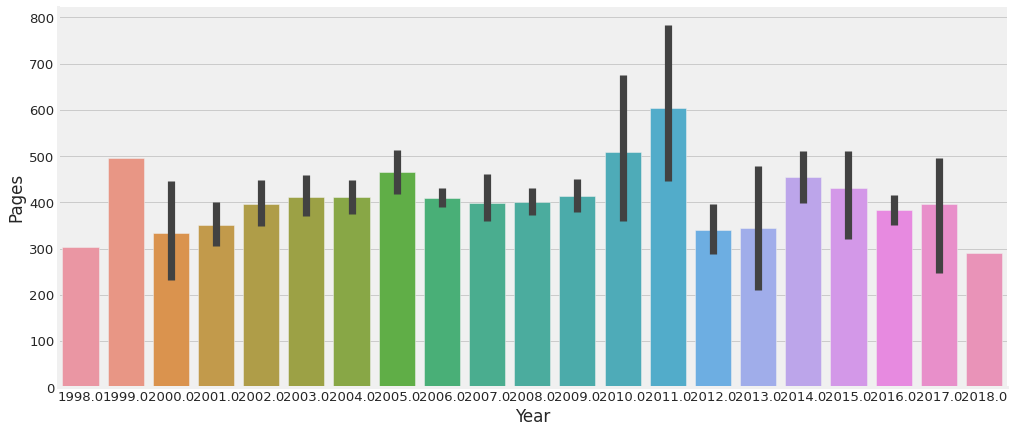

In [9]:
df_years = df[['Year', 'Pages']]
#df.plot(x='Year', y='Pages')
plt.figure(figsize=(17, 7))
sns.set(font_scale= 1.2)
plt.style.use('fivethirtyeight')
sns.color_palette("mako", as_cmap=True)

sns.barplot(x='Year', y='Pages', data=df)
sns.despine()


Graph shows almost a normal distribution even regardless of the outliers 

Another way is to check for negative correlation from matrix correlation  which is slightly positive (0.038)

### In conclusion best Books are not getting shouter.

## 4- The books with the highest review number will also have good ratings!

H(1) The Alternative Hypothesis is that bigger reviews number does note refer to high average ratting 

H(0) The Null Hypothesis is that high review number mostly refer to an expected high average rate

In this Hypothesis we are checking if there is a positive correlation between average rating and review number which as shown before in the correlation matrix a slightly positive correlation  (0.032) 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0867bd3-5624-476b-af8a-bd1f917bd510' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>